# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


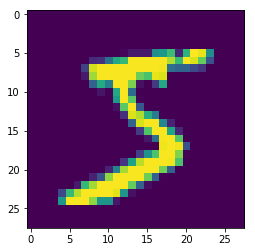

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Dropout(0.3))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))
model.add(Convolution2D(10, 1))#, activation='relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(12, (3, 3), activation='relu'))
#model.add(Dropout(0.1))
#model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 1))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 12, 12, 10)        330       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 10, 10, 32)        2912      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 5, 5, 10)          330       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 25s 413us/step - loss: 0.3108 - acc: 0.9014
Epoch 2/20
60000/60000 [==============================] - 23s 383us/step - loss: 0.0950 - acc: 0.9708
Epoch 3/20
60000/60000 [==============================] - 23s 390us/step - loss: 0.0706 - acc: 0.9783
Epoch 4/20
60000/60000 [==============================] - 23s 375us/step - loss: 0.0586 - acc: 0.9814
Epoch 5/20
60000/60000 [==============================] - 22s 373us/step - loss: 0.0532 - acc: 0.9837
Epoch 6/20
60000/60000 [==============================] - 23s 382us/step - loss: 0.0512 - acc: 0.9836
Epoch 7/20
60000/60000 [==============================] - 23s 391us/step - loss: 0.0443 - acc: 0.9859
Epoch 8/20
60000/60000 [==============================] - 23s 379us/step - loss: 0.0410 - acc: 0.9867
Epoch 9/20
60000/60000 [==============================] - 23s 376us/step - loss: 0.0410 - acc: 0.9869
Epoch 10/20
60000/60000 [==============================] - 24s 395us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.02187914111134596, 0.9932]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.28390088e-13 4.34680243e-11 5.25798205e-09 1.33807532e-09
  1.35694060e-12 9.92459804e-13 1.06392094e-17 1.00000000e+00
  1.01598218e-11 8.02923328e-09]
 [2.64542848e-07 1.35012306e-06 9.99998331e-01 1.73477543e-09
  7.11232668e-13 4.88673229e-14 1.83475701e-09 9.16727361e-10
  4.08239276e-11 3.80437887e-16]
 [1.53349298e-08 9.99995232e-01 2.81996027e-08 1.45769521e-08
  2.43800446e-06 5.18595130e-07 6.00888882e-07 1.23234440e-06
  1.55956459e-09 6.96054769e-09]
 [9.99983788e-01 4.84947022e-12 1.62833977e-08 5.22199954e-08
  7.00989711e-09 8.47040099e-07 1.24658736e-05 1.98159289e-09
  2.31429453e-07 2.47489834e-06]
 [8.78825138e-12 1.30487763e-08 2.95094615e-09 1.20592094e-13
  9.99998093e-01 2.35881106e-12 7.41697259e-11 2.56897241e-08
  3.10823567e-09 1.90301796e-06]
 [2.27050434e-10 9.99995947e-01 2.09904161e-09 6.03299466e-10
  3.18096636e-06 6.15008711e-09 2.31600819e-08 8.51523737e-07
  1.15689416e-10 3.45198625e-09]
 [3.38460596e-13 1.38632083e-06 8.08498868e-09 8.05871082e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
layer_dict

{'activation_8': <keras.layers.core.Activation at 0x7f0c1ed0c6a0>,
 'conv2d_57': <keras.layers.convolutional.Conv2D at 0x7f0c1eea0d30>,
 'conv2d_58': <keras.layers.convolutional.Conv2D at 0x7f0c1eea0208>,
 'conv2d_59': <keras.layers.convolutional.Conv2D at 0x7f0c1eeb2d30>,
 'conv2d_60': <keras.layers.convolutional.Conv2D at 0x7f0c1eeb2b38>,
 'conv2d_61': <keras.layers.convolutional.Conv2D at 0x7f0c1ef7a7b8>,
 'conv2d_62': <keras.layers.convolutional.Conv2D at 0x7f0c1edda588>,
 'conv2d_63': <keras.layers.convolutional.Conv2D at 0x7f0c1edf19b0>,
 'conv2d_64': <keras.layers.convolutional.Conv2D at 0x7f0c1edf1668>,
 'dropout_10': <keras.layers.core.Dropout at 0x7f0c1ee16080>,
 'dropout_9': <keras.layers.core.Dropout at 0x7f0c1edc5f60>,
 'flatten_8': <keras.layers.core.Flatten at 0x7f0c1edbcac8>,
 'max_pooling2d_15': <keras.layers.pooling.MaxPooling2D at 0x7f0c1ee60198>,
 'max_pooling2d_16': <keras.layers.pooling.MaxPooling2D at 0x7f0c1ee01dd8>}

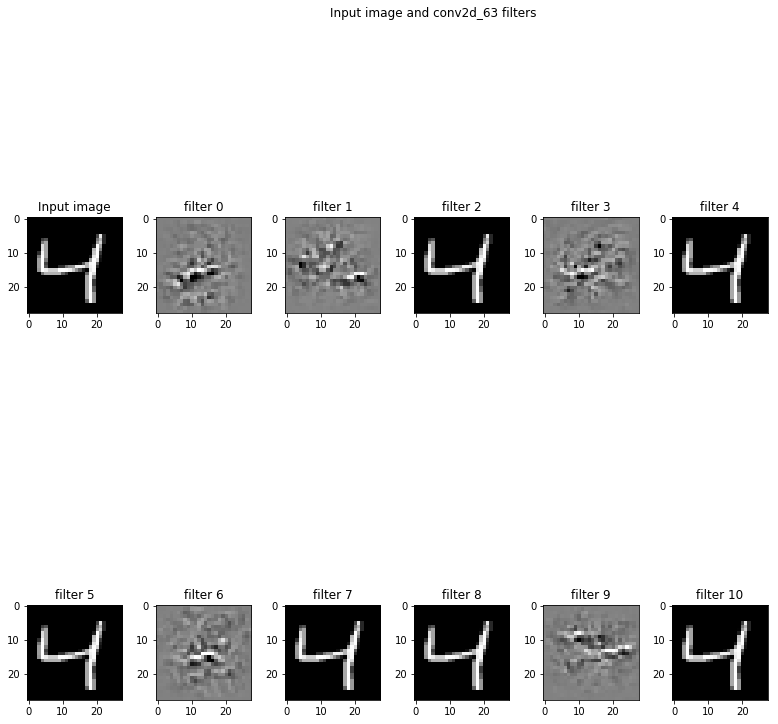

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_63'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()